In [2]:
import pandas as pd
#Google colab does not have pickle
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import seaborn as sns

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

In [3]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(6)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDKQK, KDKQKK, DKQKKK, KQKKKK, QKKKKE, KKKKE...","[MAKASR, AKASRH, KASRHN, ASRHNL, SRHNLS, RHNLS..."
1,"[MSWSGL, SWSGLL, WSGLLH, SGLLHG, GLLHGL, LLHGL...","[MQHVTG, QHVTGS, HVTGSK, VTGSKR, TGSKRR, GSKRR..."
2,"[MSLFDL, SLFDLF, LFDLFR, FDLFRG, DLFRGF, LFRGF...","[MAELPA, AELPAK, ELPAKR, LPAKRR, PAKRRF, AKRRF..."
3,"[MAVAPR, AVAPRL, VAPRLF, APRLFG, PRLFGG, RLFGG...","[MRIFAI, RIFAIS, IFAISC, FAISCS, AISCSS, ISCSS..."
4,"[MSTIQS, STIQSE, TIQSET, IQSETD, QSETDC, SETDC...","[MSYAFP, SYAFPG, YAFPGT, AFPGTF, FPGTFP, PGTFP..."
...,...,...
6265,"[MSYFGE, SYFGEH, YFGEHF, FGEHFW, GEHFWG, EHFWG...","[MITTDG, ITTDGN, TTDGNS, TDGNSA, DGNSAV, GNSAV..."
6266,"[MTVGKS, TVGKSS, VGKSSK, GKSSKM, KSSKML, SSKML...","[MSQPPF, SQPPFW, QPPFWQ, PPFWQQ, PFWQQK, FWQQK..."
6267,"[MNNLSF, NNLSFS, NLSFSE, LSFSEL, SFSELC, FSELC...","[MSEDRH, SEDRHQ, EDRHQQ, DRHQQR, RHQQRQ, HQQRQ..."
6268,"[MAPEIN, APEINL, PEINLP, EINLPG, INLPGP, NLPGP...","[MKNLSF, KNLSFV, NLSFVA, LSFVAG, SFVAGL, FVAGL..."


Median length of Human sequence is 477


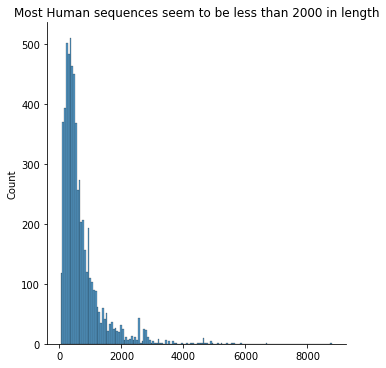

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 334


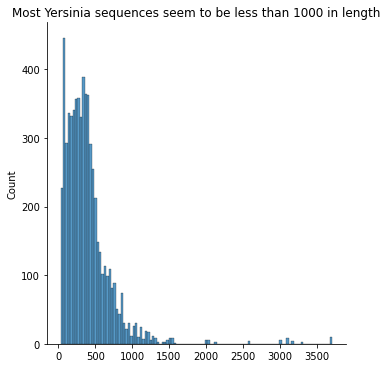

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

Median length of Joined sequence is 877


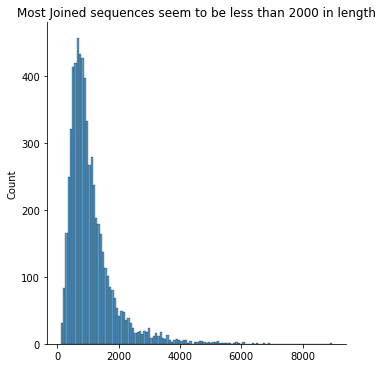

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

In [4]:
data1_6D_doubleip_pre,data2_6D_doubleip_pre,data1_test_6D_doubleip_pre,data2_test_6D_doubleip_pre,num_words_6D,MAX_SEQUENCE_LENGTH_6D_dIP,MAX_VOCAB_SIZE_6D = f.get_seq_data_doubleip(850000,500,df_train,df_test, pad='pre')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequences1_train length: 5630
min sequences1_train length: 0
median sequences1_train length: 199
max word index sequences1_train: 849999
max sequences2_train length: 3705
min sequences2_train length: 0
median sequences2_train length: 329
max word index sequences2_train: 849999
Found 2438322 unique tokens in tokenizer1.
Found 864366 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 500)
Shape of data2 tensor: (6270, 500)
max test_sequences1 length: 5630
min test_sequences1 length: 0
median test_sequences1 length: 70
max test_sequences2 length: 3705
min test_sequences2 length: 0
median test_sequences2 length: 284
pre padding for test seq.
Shape of test_data1 tensor: (1514, 500)
Shape of test_data2 tensor: (1514, 500)
num_words is 850000


In [5]:
data1_6D_doubleip_center,data2_6D_doubleip_center,data1_test_6D_doubleip_center,data2_test_6D_doubleip_center,num_words_6D,MAX_SEQUENCE_LENGTH_6D_dIP,MAX_VOCAB_SIZE_6D = f.get_seq_data_doubleip(850000,500,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequences1_train length: 5630
min sequences1_train length: 0
median sequences1_train length: 199
max word index sequences1_train: 849999
max sequences2_train length: 3705
min sequences2_train length: 0
median sequences2_train length: 329
max word index sequences2_train: 849999
Found 2438322 unique tokens in tokenizer1.
Found 864366 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 500)
Shape of data2 tensor: (6270, 500)
max test_sequences1 length: 5630
min test_sequences1 length: 0
median test_sequences1 length: 70
max test_sequences2 length: 3705
min test_sequences2 length: 0
median test_sequences2 length: 284
Center padding for test seq.
Shape of test_data1 tensor: (1514, 500)
Shape of test_data2 tensor: (1514, 500)
num_words is 850000


In [6]:
data1_6D_doubleip_post,data2_6D_doubleip_post,data1_test_6D_doubleip_post,data2_test_6D_doubleip_post,num_words_6D,MAX_SEQUENCE_LENGTH_6D_dIP,MAX_VOCAB_SIZE_6D = f.get_seq_data_doubleip(850000,500,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequences1_train length: 5630
min sequences1_train length: 0
median sequences1_train length: 199
max word index sequences1_train: 849999
max sequences2_train length: 3705
min sequences2_train length: 0
median sequences2_train length: 329
max word index sequences2_train: 849999
Found 2438322 unique tokens in tokenizer1.
Found 864366 unique tokens in tokenizer2.
post padding
Shape of data1 tensor: (6270, 500)
Shape of data2 tensor: (6270, 500)
max test_sequences1 length: 5630
min test_sequences1 length: 0
median test_sequences1 length: 70
max test_sequences2 length: 3705
min test_sequences2 length: 0
median test_sequences2 length: 284
post padding for test seq.
Shape of test_data1 tensor: (1514, 500)
Shape of test_data2 tensor: (1514, 500)
num_words is 850000


In [7]:
data_6D_join_pre,data_test_6D_join_pre,num_words_6D,MAX_SEQUENCE_LENGTH_6D_J,MAX_VOCAB_SIZE_6D = f.get_seq_data_join(850000,500,df_train,df_test,pad='pre')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequence_data length: 6856
min sequence_data length: 5
median sequence_data length: 436
max word index: 849999
Found 3205693 unique tokens.
pre padding.
Shape of data tensor: (6270, 500)
max sequences_test length: 5558
min sequences_test length: 4
median sequences_test length: 261
pre padding for test seq.
Shape of data_test tensor: (1514, 500)
num_words is 850000


In [8]:
data_6D_join_center,data_test_6D_join_center,num_words_6D,MAX_SEQUENCE_LENGTH_6D_J,MAX_VOCAB_SIZE_6D = f.get_seq_data_join(850000,500,df_train,df_test,pad='center')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequence_data length: 6856
min sequence_data length: 5
median sequence_data length: 436
max word index: 849999
Found 3205693 unique tokens.
Center padding.
Shape of data tensor: (6270, 500)
max sequences_test length: 5558
min sequences_test length: 4
median sequences_test length: 261
Center padding for test seq.
Shape of data_test tensor: (1514, 500)
num_words is 850000


In [9]:
data_6D_join_post,data_test_6D_join_post,num_words_6D,MAX_SEQUENCE_LENGTH_6D_J,MAX_VOCAB_SIZE_6D = f.get_seq_data_join(850000,500,df_train,df_test,pad='post')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequence_data length: 6856
min sequence_data length: 5
median sequence_data length: 436
max word index: 849999
Found 3205693 unique tokens.
post padding.
Shape of data tensor: (6270, 500)
max sequences_test length: 5558
min sequences_test length: 4
median sequences_test length: 261
post padding for test seq.
Shape of data_test tensor: (1514, 500)
num_words is 850000


In [11]:
EMBEDDING_DIM_6D = 15
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5
DROP = 0.5
x1_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)

x1_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x4_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x5_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x6_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x2_join.output, x3_join.output, x1_doubleip.output, x2_doubleip.output, x3_doubleip.output, x4_doubleip.output, x5_doubleip.output, x6_doubleip.output])
x = Dense(128)(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model6D_CNN_combine = Model(inputs=[x1_join.input, x2_join.input, x3_join.input, x1_doubleip.input, x2_doubleip.input, x3_doubleip.input, x4_doubleip.input, x5_doubleip.input, x6_doubleip.input], outputs=output)

model6D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


trains = [data_6D_join_pre,data_6D_join_center,data_6D_join_post, data1_6D_doubleip_pre,data1_6D_doubleip_center,data1_6D_doubleip_post, data2_6D_doubleip_pre,data2_6D_doubleip_center,data2_6D_doubleip_post]
tests = [data_test_6D_join_pre,data_test_6D_join_center,data_test_6D_join_post, data1_test_6D_doubleip_pre,data1_test_6D_doubleip_center,data1_test_6D_doubleip_post, data2_test_6D_doubleip_pre,data2_test_6D_doubleip_center,data2_test_6D_doubleip_post]

model6D_CNN_combine.fit(trains, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model6D_CNN_combine.predict(tests)))

#batch_size=BATCH_SIZE,

Epoch 1/5
49/49 [==============================] - 55s 1s/step - loss: 0.5595 - accuracy: 0.7042 - val_loss: 0.4239 - val_accuracy: 0.8124
Epoch 2/5
49/49 [==============================] - 51s 1s/step - loss: 0.2838 - accuracy: 0.8787 - val_loss: 0.4225 - val_accuracy: 0.8104
Epoch 3/5
49/49 [==============================] - 52s 1s/step - loss: 0.0550 - accuracy: 0.9841 - val_loss: 0.4822 - val_accuracy: 0.8342
Epoch 4/5
49/49 [==============================] - 51s 1s/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.5706 - val_accuracy: 0.8342
Epoch 5/5
49/49 [==============================] - 51s 1s/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.5941 - val_accuracy: 0.8362
0.8978952934216795


In [12]:
EMBEDDING_DIM_6D = 15
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5
DROP = 0.6
x1_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)

x1_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x4_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x5_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x6_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x2_join.output, x3_join.output, x1_doubleip.output, x2_doubleip.output, x3_doubleip.output, x4_doubleip.output, x5_doubleip.output, x6_doubleip.output])
x = Dense(128)(x)
x = Dropout(DROP)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model6D_CNN_combine = Model(inputs=[x1_join.input, x2_join.input, x3_join.input, x1_doubleip.input, x2_doubleip.input, x3_doubleip.input, x4_doubleip.input, x5_doubleip.input, x6_doubleip.input], outputs=output)

model6D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


trains = [data_6D_join_pre,data_6D_join_center,data_6D_join_post, data1_6D_doubleip_pre,data1_6D_doubleip_center,data1_6D_doubleip_post, data2_6D_doubleip_pre,data2_6D_doubleip_center,data2_6D_doubleip_post]
tests = [data_test_6D_join_pre,data_test_6D_join_center,data_test_6D_join_post, data1_test_6D_doubleip_pre,data1_test_6D_doubleip_center,data1_test_6D_doubleip_post, data2_test_6D_doubleip_pre,data2_test_6D_doubleip_center,data2_test_6D_doubleip_post]

model6D_CNN_combine.fit(trains, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model6D_CNN_combine.predict(tests)))

#batch_size=BATCH_SIZE,

Epoch 1/5
49/49 [==============================] - 54s 1s/step - loss: 0.5560 - accuracy: 0.7249 - val_loss: 0.4310 - val_accuracy: 0.8190
Epoch 2/5
49/49 [==============================] - 51s 1s/step - loss: 0.2973 - accuracy: 0.8787 - val_loss: 0.4525 - val_accuracy: 0.8058
Epoch 3/5
49/49 [==============================] - 51s 1s/step - loss: 0.0874 - accuracy: 0.9689 - val_loss: 0.4943 - val_accuracy: 0.8091
Epoch 4/5
49/49 [==============================] - 51s 1s/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.5412 - val_accuracy: 0.8316
Epoch 5/5
49/49 [==============================] - 51s 1s/step - loss: 0.0072 - accuracy: 0.9971 - val_loss: 0.6270 - val_accuracy: 0.8336
0.8969232997527262


In [ ]:
EMBEDDING_DIM_6D = 15
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5
DROP = 0.5
x1_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_join = f.conv_model(MAX_SEQUENCE_LENGTH_6D_J,EMBEDDING_DIM_6D,num_words_6D,DROP)

x1_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x3_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x4_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x5_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)
x6_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_6D_dIP,EMBEDDING_DIM_6D,num_words_6D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x2_join.output, x3_join.output, x1_doubleip.output, x2_doubleip.output, x3_doubleip.output, x4_doubleip.output, x5_doubleip.output, x6_doubleip.output])
x = Dense(128)(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model6D_CNN_combine = Model(inputs=[x1_join.input, x2_join.input, x3_join.input, x1_doubleip.input, x2_doubleip.input, x3_doubleip.input, x4_doubleip.input, x5_doubleip.input, x6_doubleip.input], outputs=output)

model6D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


trains = [data_6D_join_pre,data_6D_join_center,data_6D_join_post, data1_6D_doubleip_pre,data1_6D_doubleip_center,data1_6D_doubleip_post, data2_6D_doubleip_pre,data2_6D_doubleip_center,data2_6D_doubleip_post]
tests = [data_test_6D_join_pre,data_test_6D_join_center,data_test_6D_join_post, data1_test_6D_doubleip_pre,data1_test_6D_doubleip_center,data1_test_6D_doubleip_post, data2_test_6D_doubleip_pre,data2_test_6D_doubleip_center,data2_test_6D_doubleip_post]

model6D_CNN_combine.fit(trains, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model6D_CNN_combine.predict(tests)))

#batch_size=BATCH_SIZE,

Epoch 1/5
196/196 [==============================] - 147s 652ms/step - loss: 0.5561 - accuracy: 0.7148 - val_loss: 0.4054 - val_accuracy: 0.8111
Epoch 2/5
196/196 [==============================] - 127s 649ms/step - loss: 0.1430 - accuracy: 0.9490 - val_loss: 0.4004 - val_accuracy: 0.8355
Epoch 3/5
196/196 [==============================] - 127s 650ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.5931 - val_accuracy: 0.8487
Epoch 4/5
196/196 [==============================] - 127s 648ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.7275 - val_accuracy: 0.8289
Epoch 5/5
196/196 [==============================] - 127s 647ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.7876 - val_accuracy: 0.8243
0.9139663449373437
